In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load image and convert to grayscale

In [ ]:
image = cv2.imread("images/Lenna.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 2. Generate Gaussian noise and add it to the image

In [3]:
sigma = 15
noise = np.random.normal(0, sigma, gray.shape)  # Gaussian noise
noisy_image = gray.astype(np.float32) + noise   # Add noise

# Clip values to keep them within valid range
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

# 3. Apply Gaussian Blur filter

In [4]:
filtered_image = cv2.GaussianBlur(noisy_image, (5,5), 0)

# 4. Compute residual noise

In [5]:
residual = noisy_image.astype(np.float32) - filtered_image.astype(np.float32)
residual_mean = np.mean(np.abs(residual))

print("Residual Noise (mean absolute difference):", residual_mean)

Residual Noise (mean absolute difference): 11.504734


# 5. Display original, noisy, and filtered images

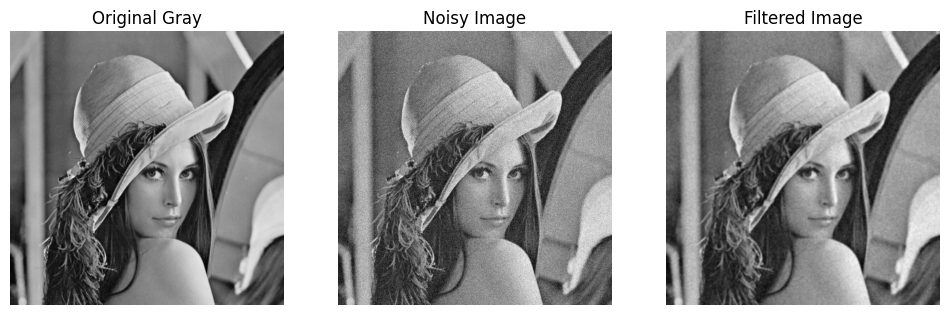

In [6]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Original Gray")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Filtered Image")
plt.imshow(filtered_image, cmap='gray')
plt.axis('off')

plt.show()